# Lecture 34 - Artificial Neural Network; Multi-Layer Perceptron

### Review Soft-Margin SVM (Vapnik & Cortes, 1995)

Allows for points to be misclassified or lie inside the margin, in order to promote **generalization** and maintain a margin as large as possible. 

Each point in training, has a **slack variable**, $xi_n \geq 0 \forall n=1,2,\dots, N$, associated with it. The collective slack variables $\xi$ control the hardness of the margin. 

* For very large $\xi$, the margin is hard, and points cannot lie in it. 
* For smaller $\xi$, the margin is softer, and can grow to encompass some points.

A **slack variable** is defined as :
* $\xi_n = 0$ for data points that are on or inside the correct margin boundary, and 
* $\xi_n = |t_n - y(x_n)|$ for other points. 

Thus a data point that is on the decision boundary $y(x_n) = 0$ will have $\xi_n = 1$, and points with $\xi_n > 1$ will be misclassified. The exact classification constraints are then replaced with

$$t_n y(x_n) \geq 1 - \xi_n, n = 1, \dots, N$$

in which the slack variables are constrained to satisfy $\xi_n \geq 0$. 

* Data points for which $\xi_n = 0$ are correctly classified and are either on the margin or on the correct side of the margin. 
* Points for which $0 < \xi_n \leq 1$ lie inside the margin, but on the correct side of the decision boundary.
* And those data points for which $\xi_n > 1$ lie on the wrong side of the decision boundary and are misclassified.

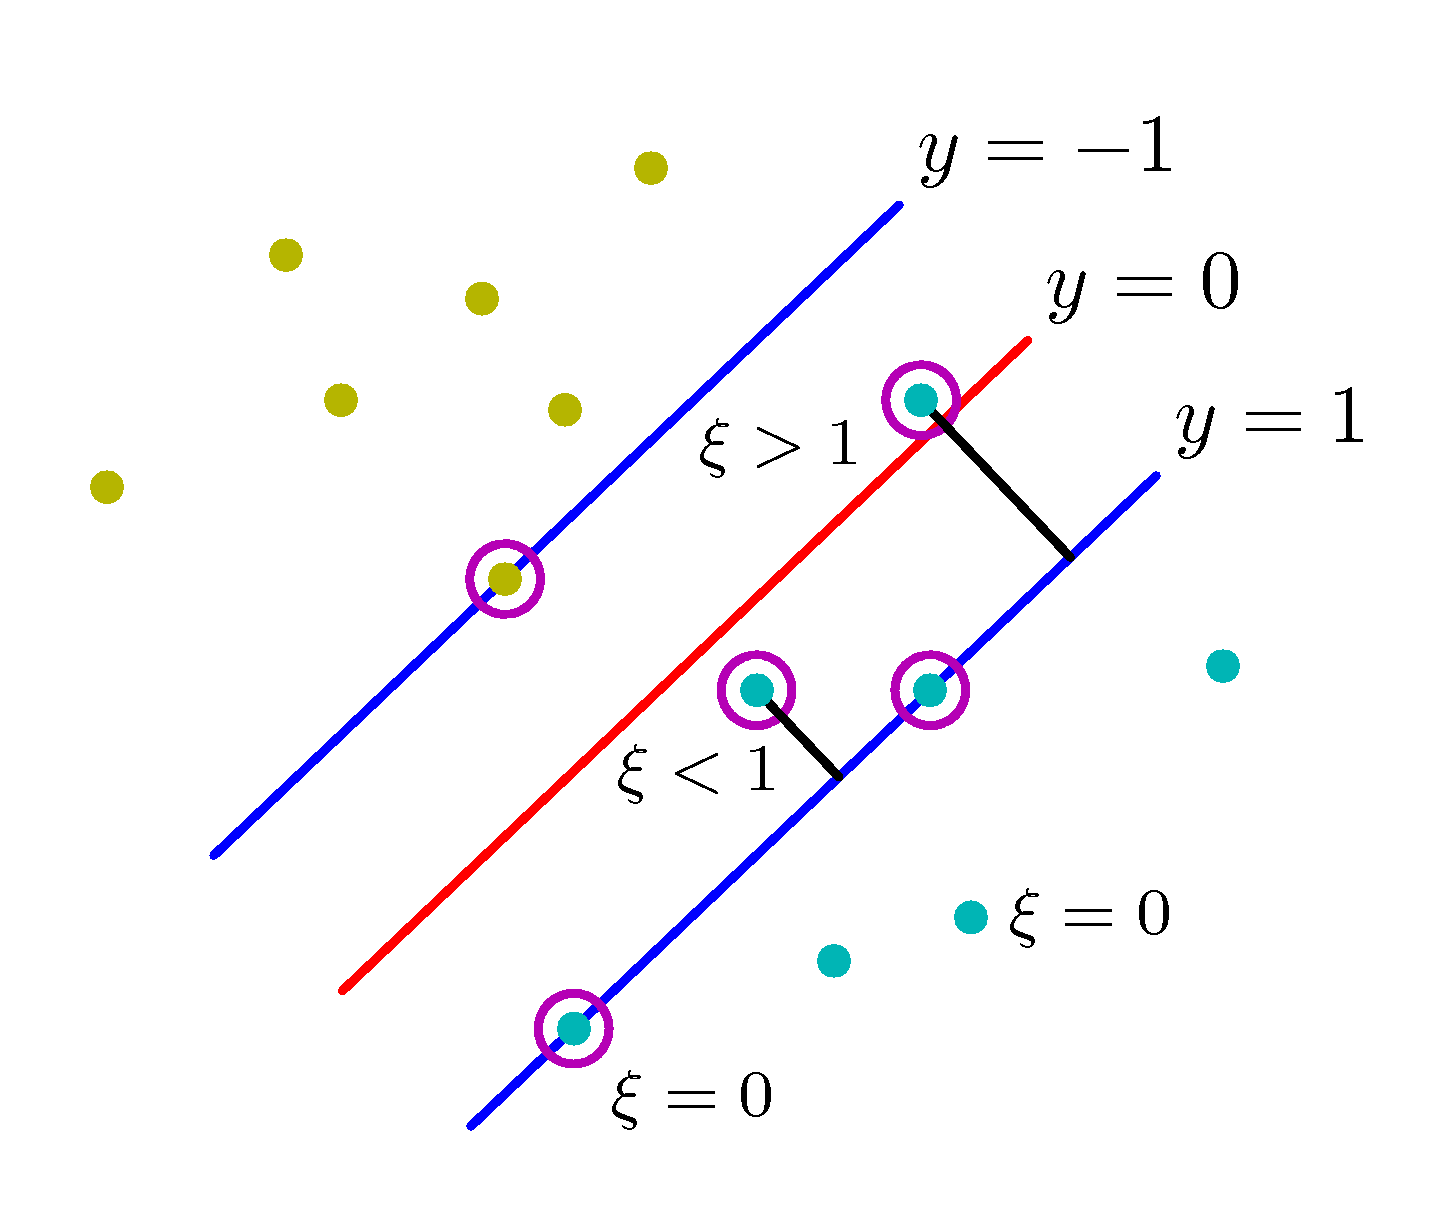

In [1]:
from IPython.display import Image
Image('figures/Figure7.3.png', width=400)

Our goal is now to maximize the margin while softly penalizing points that lie on the wrong side of the margin boundary. We therefore minimize:

\begin{align*}
&\arg_{w,b} \min C\sum_{n=1}^N \xi_n + \frac{1}{2} \Vert w\Vert^2 \\
\text{subject to    } &t_n y(x_n) \geq 1 - \xi_n, n = 1, \dots, N\\
\text{and    } &\xi_n \geq 0, n = 1, \dots, N
\end{align*}

where the parameter $C>0$ controls the trade-off between the slack variable penalty and the margin.

Constructing the primal Lagrangian, and then representing it in its dual Lagrangian form, we obtain:

\begin{align*}
\tilde{L}(a) = \sum_{n=1}^N a_n - \sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m k(x_n, x_m)
\end{align*}

which is identical to the separable case, except that the constraints are somewhat different. We therefore have to minimize $\tilde{L}(a)$ with respect to the dual variables $\{a_n\}$ subject to

\begin{align*}
0 \leq a_n \leq C
\end{align*}

\begin{align*}
\sum_{n=1}^N a_n t_n = 0
\end{align*}

As before, a subset of the data points may have $a_n = 0$, in which case they do not contribute to the predictive model. The remaining data points constitute the support vectors. These have $a_n > 0$ and hence $t_n y(x_n) = 1 - \xi_n$.

$$y(x) = \sum_{m\in S} a_m t_m k(x,x_m) + b$$

* If $a_n < C$, then $\mu_n > 0$, which requires $\xi_n = 0$ and hence such points lie on the margin. 

* Points with $a_n = C$ can lie inside the margin and can either be correctly classified if $\xi_n \leq 1$ or misclassified if $\xi_n >1$.

To determine the parameter $b$, we note that those support vectors for which $0 < a_n < C$ have $\xi_n = 0$ so that $t_n y(x_n) = 1$ and hence will satisfy

\begin{align*}
t_n \left(\sum_{m\in S} a_m t_m k(x_n, x_m) + b\right) = 1
\end{align*}

Again, a numerically stable solution is obtained by averaging to give

\begin{align*}
b = \frac{1}{N_M} \sum_{n\in M}\left(t_n - \sum_{m\in S} a_m t_m k(x_n, x_m)\right)
\end{align*}

where $M$ denotes the set of indices of data points having $0 < a_n < C$.

Although predictions for new inputs are made using only the support vectors, the training phase (i.e., the determination of the parameters $a$ and $b$) makes use of the whole data set, and so it is important to have **efficient algorithms for solving the quadratic programming problem**.

We first note that the objective function $\tilde{L}(a)$ is quadratic and so any local optimum will also be a **global
optimum** provided the constraints define a convex region (which they do as a consequence of being linear).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Code from Python Data Science Handbook
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [ ]:
from sklearn.svm import SVC

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 5, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value for the $C$ parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure.

___

## *Where does knowledge come from?*

* Evolution (encoded in our DNA)
* Experience (encoded in our brains)
* Culture
* Computers

There is also another emergent source of knowledge: computers! As Yann LeCun, co-recipient of Turing Award, and Chief AI Scientist at ~Facebook~ Meta said: "*Most of the knowledge in the world in the future is going to be extracted by machines and will reside in machines.*"

And so, how do computers discover new knowledge? Pedro Domingos, the author of the book *Master Algorithm*, posed it in terms of the *Five Tribes of Machine Learning*:

### The Symbolists -- Fill in gaps in existent knowledge

* Williams, K., Bilsland, E., Sparkes, A., Aubrey, W., Young, M., Soldatova, L. N., De Grave, K., Ramon, J., de Clare, M., Sirawaraporn, W., Oliver, S. G., & King, R. D. (2015). ["Cheaper faster drug development validated by the repositioning of drugs against neglected tropical diseases".](https://royalsocietypublishing.org/doi/10.1098/rsif.2014.1289) Journal of the Royal Society, Interface, 12(104).

<h4 align="center">Robot Eve, 2015</h4>

![Eve](https://royalsocietypublishing.org/cms/asset/749042b3-f455-431f-8803-e59f23c457d6/rsif20141289f02.jpg)

* Futurism, ["Robot *Scientist* Helps Discover New Ingredient for Antimalarial Drug"](https://futurism.com/robot-scientist-helps-discover-new-ingredient-antimalarial-drug), 2018.

<h4 align="center">Robot Eve and Computer Scientist</h4>

![Robot Eve](https://www.wired.com/images_blogs/wiredscience/2011/04/robot-scientist-adam-ross-king-aberystwyth.jpg)

### The Bayesians -- Systematically reduce uncertainty

The general purpose learner of *The Bayesians* is probabilistic inference using Bayesian statistics to minimize uncertainty.

Some example algorithms:
* Maximum A Posteriori (MAP) likelihood
* Maximum Likelihood Estimator (MLE)
* Naive Bayes Classifier
* Bayesian Networks

Some applications:

* Risk assessment for self-driving cars
* Anti-spam filters
* Novelty detection

### The Analogizers -- Notice similarities between the old and new

The general purpose learner of *The Analogizers* are kernel machines. They look for patterns or examples and compare samples to examples (e.g. support vectors).

Some example algorithms:
* SVMs
* k-Nearest Neighbors

Some applications:
* Recommender systems (Netflix, Amazon)
* Classification of satellite data like SAR data

### The Evolutionaries -- Simulate evolution

The general purpose learner of *The Evolutionaries* is (you guessed it) evolution.

* Turning Darwin's theory into an algorithm

<h4 align="center">Genetic Algorithm</h4>

![Genetic Algorithm](https://www.raymanning.com/img/genflow.jpg)

You can use **Genetic Algorithms** (or GAs) on computer programs in order to learn the next generation of programs that best perform/fit a certain goal. You can take a step forward and actually implement GAs in robots.

* Talk by Hod Lipson, [A Robot Teaches Itself How to Walk](https://www.youtube.com/watch?v=iNL5-0_T1D0&feature=emb_rel_pause), 2012

* Article from Columbia University, [Task-agnostic self-modeling machines](https://engineering.columbia.edu/press-releases/lipson-self-aware-machines), 2019

* OpenAI, ["Solving Rubik’s Cube with a Robot Hand"](https://openai.com/blog/solving-rubiks-cube/), 2019

<h4 align="center">OpenAI, Robot's Hand Dexterity, 2018</h4>

![OpenAi-Rubik Cube](https://d15shllkswkct0.cloudfront.net/wp-content/blogs.dir/1/files/2021/07/openai.png)


### The Connectionists -- Emulate the brain

The general purpose learner of *The Connectionists* is backpropagation.

The Connectionists take inspiration in the human brain and build models that try to recreate it. And so, the most popular model is the Artifical Neural Network (ANN) model and all its variants.

Recent successes:

1. The AlphaFold Team, ["AlphaFold: A solution to a 50-year-old grand challenge in biology"](https://deepmind.com/blog/article/alphafold-a-solution-to-a-50-year-old-grand-challenge-in-biology). DeepMind, 2020

<h4 align="center">AlphaFold, DeepMind, 2020</h4>

![AlphaFold](https://a16z.com/wp-content/uploads/2020/12/alphafoldcomparison_deepmind.gif)


2. Boston Dynamics, [ATLAS](https://www.bostondynamics.com/atlas) Robot.

<h4 align="center">ATLAS, Boston Dynamics</h4>

![ATLAS](https://bdc2020.o0bc.com/wp-content/uploads/2021/01/Dancing_Robots_Tech_79415-6009c6c120b82-scaled.jpg)

All of theses "tribes" have their own general purpose *learner* that in principle can be used to learn anything. In fact, in all of them there are mathematical proves that essentially say if you give enough that it can learn anything. 

## 1st AI Winter, 1974-1980

**Reason: Lack of theoretical algorithms to automatically update the weight connections of a neural network**

* 1969 Minsky and Papert demonstrated the limits of the perceptron. They introduce multi-layer perceptrons but the published limits had the biggest influence - and interest dropped away. A few years later, the 1st AI winter began. 

* 1974 Werbos' Ph.D. thesis at Harvard developed back-propagation.

* 1986, the book "Parallel Distributed Processing: Explorations in the Microstructures of Cognition" was published and it covered back-propagation. This made Neural Networks popular again.

* 1986, Rumelhart, Hinto and Williams popularize Backpropagation with their paper:
    * Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). [Learning representations by back-propagating errors](https://www.nature.com/articles/323533a0). Nature, 323(6088), 533-536.


## 2nd AI Winter, 1987-1993

**Reason: lack of large-scale datasets, computing power**

* In 1989, Yann LeCun used back-propagation to learn the convolution kernel coefficients directly from images of hand-written numbers.

* Early 90's, Support Vector Machines (SVMs) overtook ANNs in popularity due to a number of challenges/downsides to ANNs in comparison to SVMs.  This included that soft-margin SVMs were less likely to overtrain and easier to get good results on. Also, ANNs were very slow to train and had issues when they became "deep".

* 1999 First GPU, Geforce 256, Nvidia

* 2009, Fei-Fei Li publishes the first public large-scale image dataset, IMAGENET

* 2012 ImageNet challenge won by Hinton's team using a deep CNN (based on top 5 error rate, given an image, the model does not output the correct label within its top 5 predictions). They had an error rate of 15.4\% (which was way better than 2nd place at 26.6\%). This started the current DL/ANN resurgence. Now it's huge.

* 2013 word embeddings become popular with algorithms such as Word2Vec.

* 2014 Generative Adversarial Networks (GANs) introduced by Ian GoodFellow.

* 2016 AlphaGo beats a professional Go player.

* 2017 Transformer networks are introduced, paving the way for pre-trained language models. Popularizing the expression "**Attention is All You Need**".

* 2020 Ethics for AI Community. IBM, Amazon and Microsoft ban sale of facial recognition products to law enforcement.

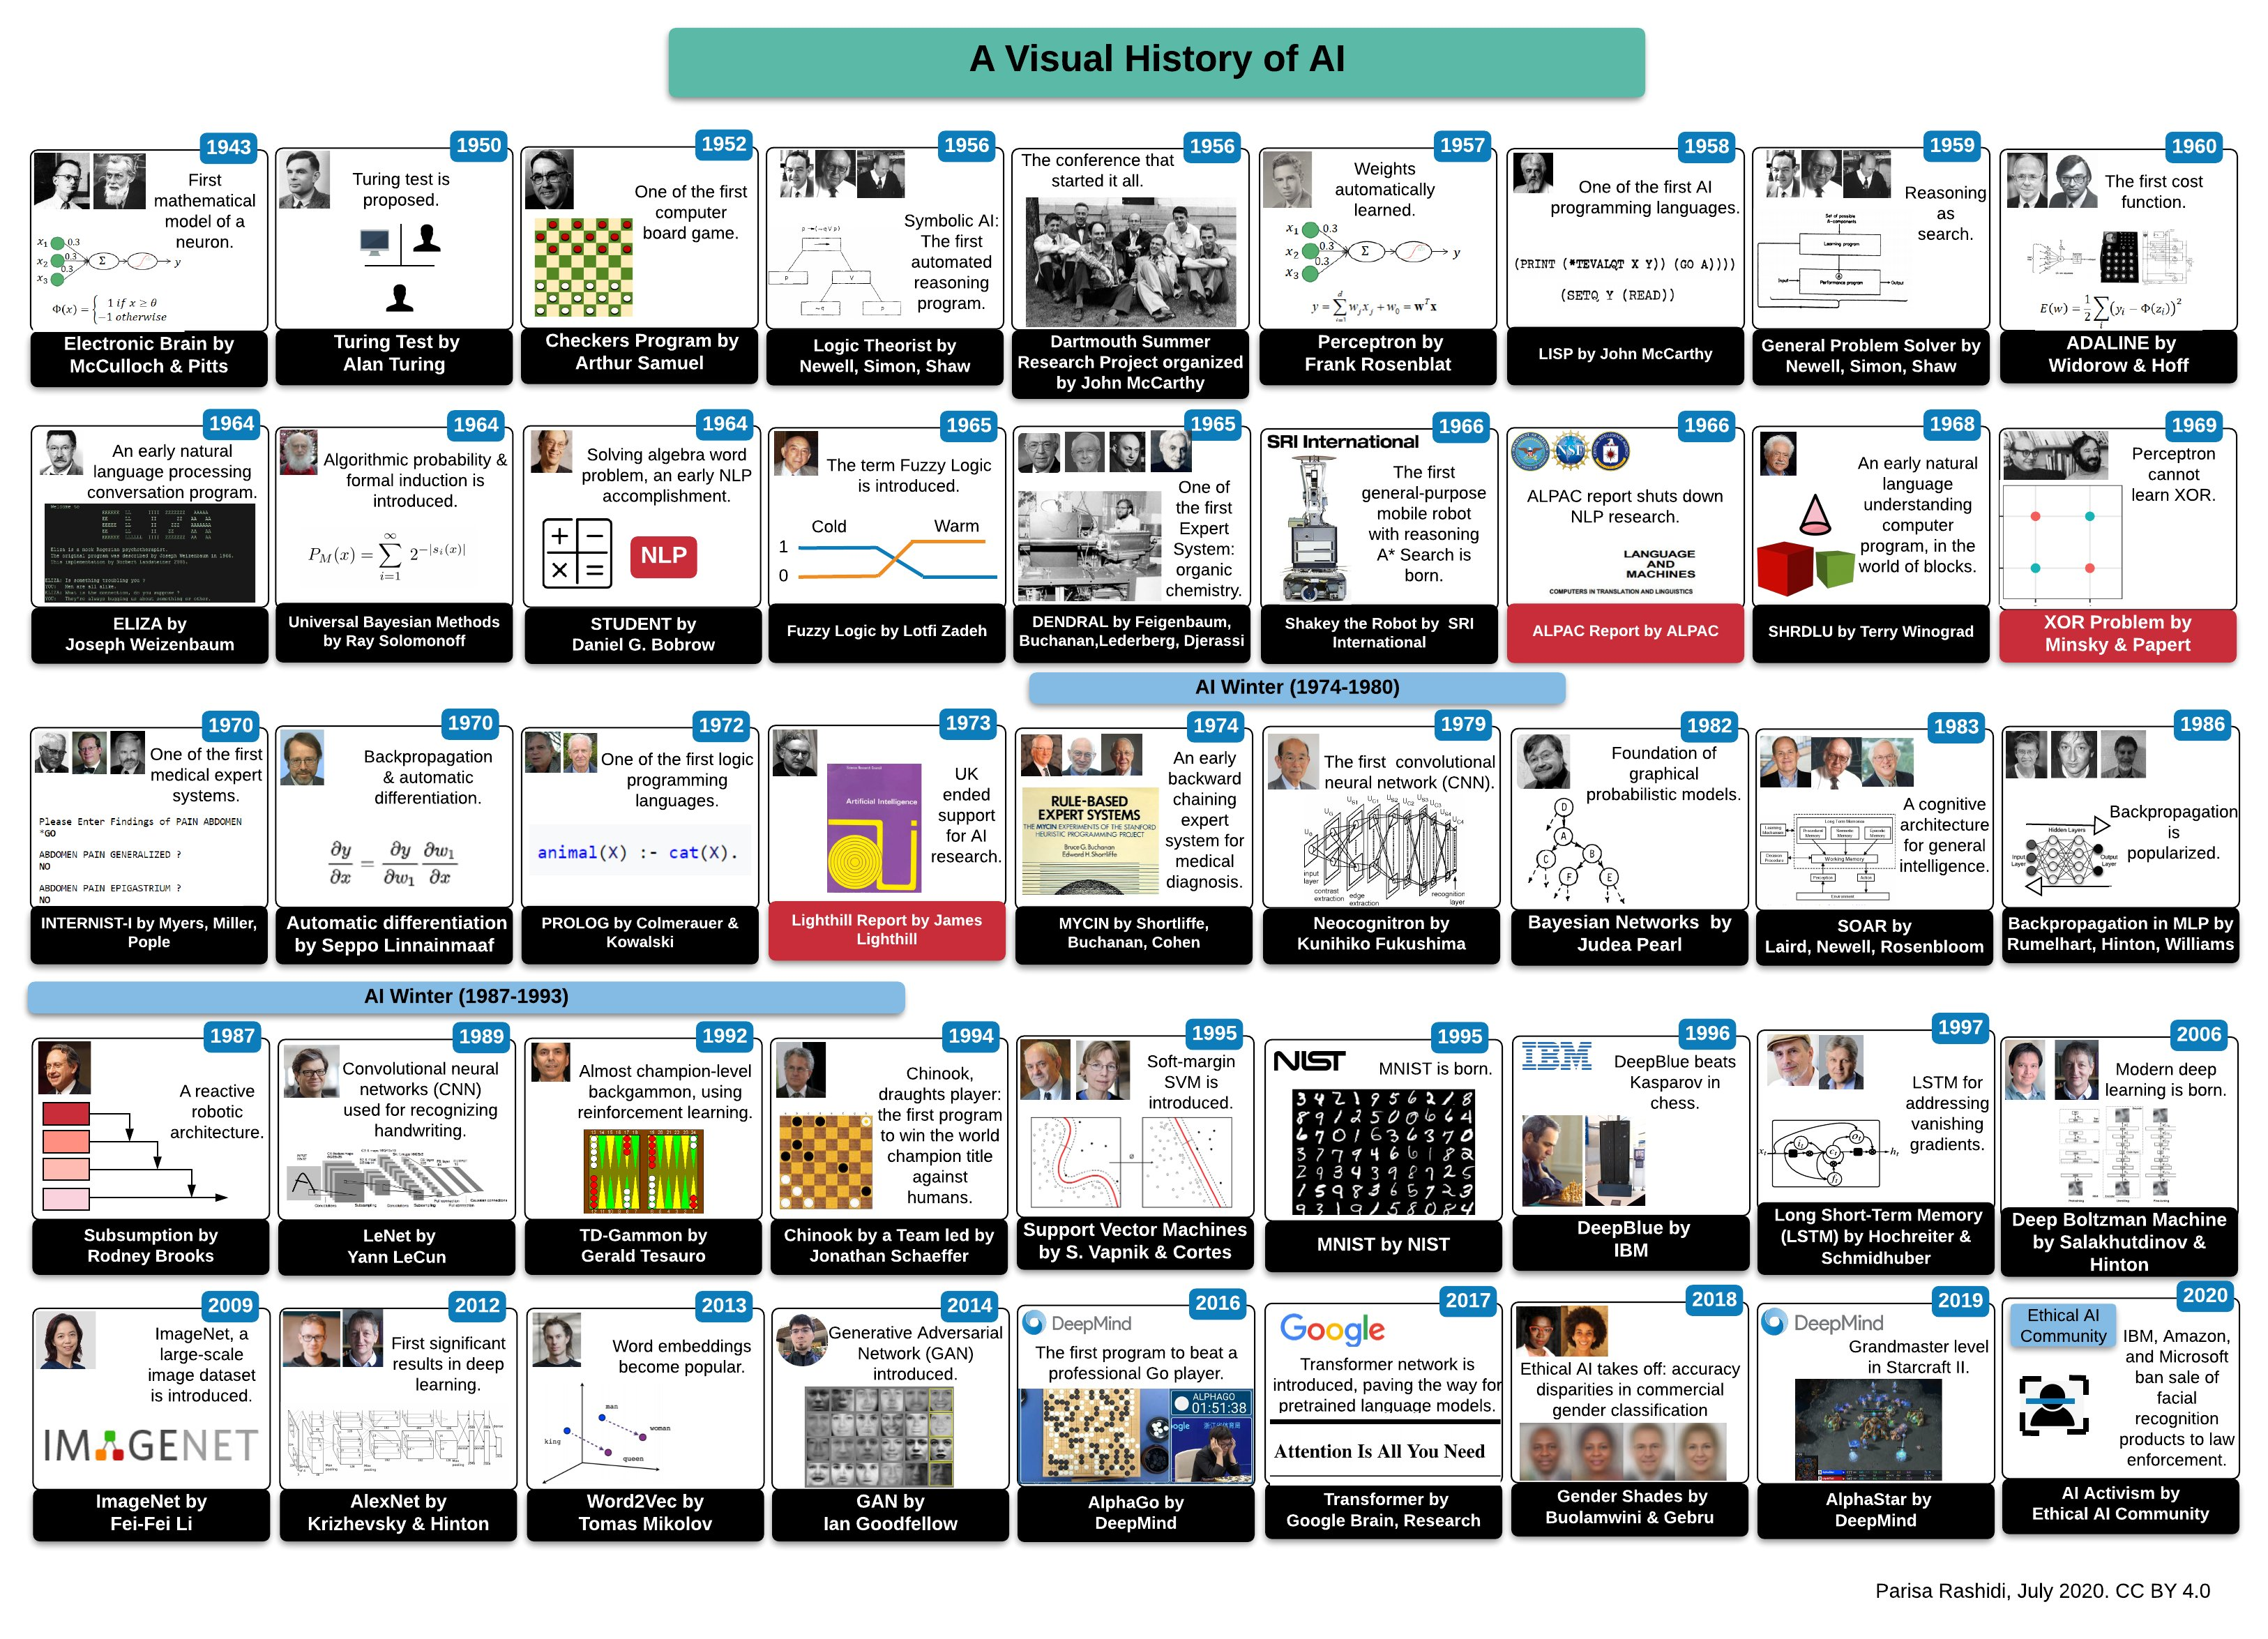

In [2]:
Image('figures/A_Visual_Histoy_of_AI.jpg',width=1000)

___

# Multi-Layer Perceptron (MLP)

A multilayer perceptron (MLP) is a class of feed-forward artificial neural network (ANN). An MLP consists of at least three layers of nodes. Except for the input nodes, each node is a neuron that uses an activation function (either linear or non-linear). 

Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [ ]:
Image('figures/mlp2.png',width=500)

In MLPs, each neuron's output can be subject to different activation functions. The choice of the activation function is in itself a *free-parameter*.
* Which activation function would you use if you desired labels are $\{1,2,3,4,\dots,8,9\}$? 

* *What each of the layers do?*
    * The first hidden layer draws boundaries
    * The second hidden layer combines the boundaries
    * The third and further layers can generate arbitrarily complex shapes

## Universal Approximation Theorem

"The *Universal Approximation Theorem* states that a feed-forward network with a single hidden layer containing a finite number of neurons can approximate continuous functions on compact subsets of $\mathbb{R}^N$, under mild assumptions on the activation function. The theorem thus states that simple neural networks can represent a wide variety of interesting functions when given appropriate parameters; however, it does not touch upon the algorithmic learnability of those parameters."

Let $\phi(\cdot)$ be a non-constant, bounded and monotonic-increasing continuous function. Let $I_{m_0}$ denote the $m_0$-dimensional unit hypercube $[0, 1]^{m_0}$. The space of continuous functions on $I_{m_0}$ is denoted by $C(I_{m_0})$.  Then, given any function $f \ni C(I_{m_0})$ and $\epsilon > 0$, there exists an integer $m_1$ and sets of real constants $\alpha_i, \beta_i,$ and $w_{ij}$, where $i = 1, \ldots, m_1$ and $j = 1, \ldots, m_0$ such that we may define

$$F(x_1, \ldots, x_{m_0}) = \sum_{i=1}^{m_1} \alpha_i \phi\left( \sum_{j=1}^{m_0} w_{ij}x_j + b_i\right)$$

as an approximation realization of the function $f(\cdot)$, that is, 

$$\left| F(x_1, \ldots, x_{m_0}) - f(x_1, \ldots, x_{m_0}) \right| < \epsilon$$

for all $x_1, x_2, \ldots, x_{m_0}$ that like in the input space.

Essentially, the Universal Approximation Theorem states that a single hidden layer is sufficient for a multilayer perceptron to compute a uniform $\epsilon$ approximation to a given training set - provided you have the *right* number of neurons and the *right* activation function. 

* However, this does not say that a single hidden layer is optimal with regards to learning time, generalization, etc.)

* In other words, a **feed-forward MLP with one hidden layer can approximate arbitrarily closely any continuous function**. (Wow!)

### Types of Activation Functions

In artificial neural networks (ANN), the *activation function* of a neuron defines the output of that neuron given an input or set of inputs.

There are many activation functions, the most common are:

1. **Heaviside step function:**
$$\phi(x) = \begin{cases}1, & x >0 \\ 0, & x\leq 0\end{cases}$$

2. **Sigmoid function:**
$$\phi(x) = \frac{1}{1+e^{-x}}$$

3. **Hyperbolic tangent function (tanh):**
$$\phi(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

4. **Rectified Linear (ReLu) function:**
$$\phi(x) = \begin{cases} x, & x\geq 0 \\ 0, & x < 0\end{cases}$$

5. **Leaky ReLu function:**
$$\phi(x) = \begin{cases} x, & x\geq 0 \\ 0.01x, & x < 0\end{cases}$$

There are many many [other functions](https://en.wikipedia.org/wiki/Activation_function) but these are the most popular.

### Exercise

Suppose you had the following neural network:

<div><img src="figures/MLP.png", width="300"><!div>

with the activation function:

\begin{align*}
\phi(x) = \begin{cases} 1 & x > 0 \\ -1 & x \leq 0 \end{cases}
\end{align*}

1. What is the expression of the output value $y$ in terms of the input values?

2. What is the output with the following input values?
    * $[0,0]$
    * $[-2, -2.5]$
    * $[-5, 5]$
    * $[10, 3]$

3. What does the decision surface of this network look like graphically? Draw it out by hand.

#### Recommended Reading 

["Learning representations by back-propagating errors"](https://www.nature.com/articles/323533a0) by David E. Rumelhart, Geoffrey E. Hinton, and Ronald J. Williams. Nature 323 (6088): 533–536, 8, October 1986.